# Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of [the Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll try to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the ***dete_survey.csv***:

> **ID**: An id used to identify the participant of the survey

> **SeparationType**: The reason why the person's employment ended

> **Cease Date**: The year or month the person's employment ended

> **DETE Start Date**: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the ***tafe_survey.csv***:

> **Record ID**: An id used to identify the participant of the survey

> **Reason for ceasing employment**: The reason why the person's employment ended

> **LengthofServiceOverall. Overall Length of Service at Institute (in years)**: The length of the person's employment (in years)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### General observations

In [2]:
# read csv files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


In [3]:
# general information on dete file:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# general information on tafe file:
tafe_survey.info()
tafe_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
# NaN values in dete file:
dete_survey.isnull().sum().sort_values()


ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

In [6]:
# NaN values in tafe file:
tafe_survey.isnull().sum().sort_values()

Record ID                                                          0
Institute                                                          0
WorkArea                                                           0
Reason for ceasing employment                                      1
CESSATION YEAR                                                     7
                                                                ... 
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Ill Health                                 265
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Main Factor. Which of these was the main factor for leaving?     589
Length: 72, dtype: int64

In [7]:
# explore years of cessation
tafe_survey['CESSATION YEAR'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64

In [8]:
# understand reasons for ceasing employment
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

**Notes:**
1. **DETE**
   - entries: rows 822, columns 56
   - dtypes: bool(18), int64(1), object(37)
   - NaN values: most reperesented in columns {Classification, Business Unit, NESB, Disability, Aboriginal, South Sea, Torres Strait}. Having more than 50% of missing data, we can suggest, it will be hard to work with it. 
   
2. **TAFE**
   - entries: rows 702, columns 72
   - dtypes: float64(2), object(70). 'CESSATION YEAR' - as float
   - NaN values: most represented in columns that describe factors for leaving current job. But general column of reasons for ceasing have only 1 missing value.

### Dropping  columns with NaN values
We will update our datasets, by reading our csv files again and specifying "Not Stated" as Nan and then dropping some columns.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [10]:
#drop columns in dete df
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)
#check updated df
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [11]:
#drop columns in tafe df
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66], axis=1)
#check updated df
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

### Columns renaming
We are going to standardize the names of columns for both datasets.

In [12]:
#make lowercase, remove whitespace from the end of the strings, replace spaces with underscores ('_') in DETE df
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
dete_survey_updated.head(2)


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [13]:
# dict of new names
new_names = {'Record ID': 'id',
            'CESSATION YEAR': 'cease_date',
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender',
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
# rename 
tafe_survey_updated.rename(columns=new_names, inplace=True)
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN




We've made some common columns names for both datesets in order to combine the data and move further in our analysis. 

### Exploring the 'Separationtype' column

In [14]:
# value_counts for dete df separationtype column:
print(dete_survey_updated['separationtype'].value_counts(ascending=True))

print('\n')

# value_counts for tafe df separationtype column:
print(tafe_survey_updated['separationtype'].value_counts(ascending=True))

Termination                              15
Contract Expired                         34
Other                                    49
Ill Health Retirement                    61
Voluntary Early Retirement (VER)         67
Resignation-Move overseas/interstate     70
Resignation-Other employer               91
Resignation-Other reasons               150
Age Retirement                          285
Name: separationtype, dtype: int64


Termination                  23
Transfer                     25
Retirement                   82
Retrenchment/ Redundancy    104
Contract Expired            127
Resignation                 340
Name: separationtype, dtype: int64


In [15]:
# make df with only "resignation" reason
pattern = r'Resignation'
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)].copy()
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

print(dete_resignation['separationtype'].value_counts())
print('\n')
print(tafe_resignation['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


Resignation    340
Name: separationtype, dtype: int64


### Logical inconsistencies in date columns

We will check the **cease_date** and **dete_start_date** columns for any logical inconsistencies or errors in order to be sure our analysis make sence.

In [16]:
# observations of 'cease_date' column:
dete_resignation['cease_date'].value_counts(ascending=True)

09/2010      1
2010         1
07/2006      1
07/2012      1
05/2012      2
05/2013      2
08/2013      4
10/2013      6
07/2013      9
11/2013      9
09/2013     11
06/2013     14
12/2013     17
01/2014     22
2013        74
2012       126
Name: cease_date, dtype: int64

In [17]:
# get format of the year '0000': cleaning, dtype changing(object-string-float)
pattern =r"([1-2][0-9][0-9][0-9])"
dete_resignation['cease_date'].astype('string')
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.extract(pattern)
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype('float')

In [18]:
# check our columns with years:
print(dete_resignation['cease_date'].value_counts(ascending=True))
print('\n')
print(dete_resignation['dete_start_date'].value_counts(ascending=True))
print('\n')
print(tafe_resignation['cease_date'].value_counts(ascending=True))

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64


1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64


2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64


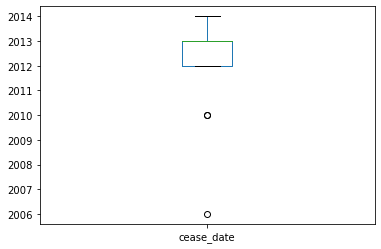

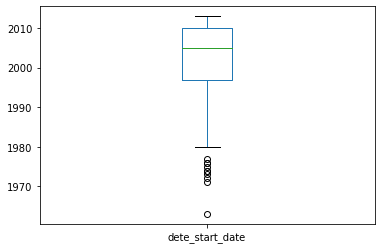

<AxesSubplot:>

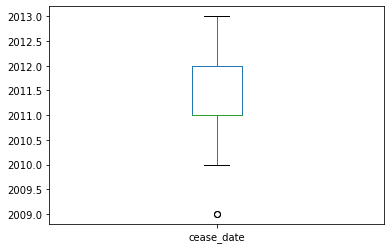

In [19]:
# make boxplots for columns with years:
dete_resignation.boxplot(column = 'cease_date',grid = False)
plt.show()
dete_resignation.boxplot(column = 'dete_start_date',grid = False)
plt.show()
tafe_resignation.boxplot(column = 'cease_date',grid = False)


In this block we cleaned and changed data in 'cease_date' column. Now all three columns in both dataframes have the similiar format and ready for next operations. At the same time, we didn't find any special logical inconsistencies in our date data.

### Years in workplace

We are going to make some preperations for analysis years in workplace. We will make a new column that counts years in workplace in DETE dataframe. TAFE has already column **institute_service**.

In [20]:
#make a new column in dete df, that counts years in workplace:
dete_resignation['institute_service'] = dete_resignation['cease_date']-dete_resignation['dete_start_date']
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


### Job dissatisfaction factors

Our next step will be to group information about dissatisfaction factors that caused employees to resign in one column **dissatisfied**.

In [21]:
print(tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [22]:
# function to make rows filled with NaN, False or True in both dfs:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True
    
# change data in dfs columns using:
# df.applymap(function) method
# df.any() method to return True or False for all columns
tafe_resignation['dissatisfied'] = (tafe_resignation[['Contributing Factors. Dissatisfaction',
                                                    'Contributing Factors. Job Dissatisfaction']]
                                    .applymap(update_vals).any(axis=1, skipna=False))


dete_resignation['dissatisfied'] = (dete_resignation[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                     'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                                                     'work_location','employment_conditions', 'work_life_balance', 'workload']]
                                    .any(axis=1, skipna=False))

# make copies of our dfs to avoid the SettingWithCopy Warning:
tafe_resignations_up = tafe_resignation.copy()
dete_resignations_up = dete_resignation.copy()

# check our new columns:
print(tafe_resignations_up['dissatisfied'].value_counts())
print('\n')
print(dete_resignations_up['dissatisfied'].value_counts())



False    241
True      91
Name: dissatisfied, dtype: int64


False    162
True     149
Name: dissatisfied, dtype: int64


We have made a new column in both dataframes that explains us whether an employee was dissatisfied or not.

### Combined data


In [23]:
# make a new column to distinguish organisations before combining:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# pd.concat to combine two dfs:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

# dropp all columns that have less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1)

# check our new df:
combined_updated.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


The result of our operations above is a new dataframe **combined_updated**, combined from our previous dataframes *dete_resignations_up* and *tafe_resignations_up*, cleaned from columns with less than 500 non null values.
Now we have 10 columns and 651 rows.

### Making categories
In this block we are going to group the data in **institute_service** under the following conditions:

- **'New'** : less than 3 years at a company
- **Experienced** : 3-6 years at a company
- **Established** : 7-10 years at a company
- **Veteran** : 11 or more years at a company

In [24]:
# check for strings from tafe dataframe, that may appear in our new df:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [25]:
# as we caused a problem with SettingWithCopy Warning, let's make a copy:
combined_updated = combined_updated.copy()

#convert to string 
#replace all ranges
#convert to float
combined_updated['institute_service'] = (combined_updated['institute_service'].
                                         astype(str).
                                         str.replace('More than 20 years', '20.0').
                                         str.replace('Less than 1 year', '1.0').
                                         str.replace('1-2', '2.0').
                                         str.replace('3-4', '4.0').
                                         str.replace('5-6', '6.0').
                                         str.replace('11-20', '16.0').
                                         str.replace('7-10', '9.0').
                                         astype(float, errors='ignore'))

# check the result
combined_updated['institute_service'].value_counts(ascending=False)

1.0     95
4.0     79
2.0     78
6.0     50
9.0     35
12.0    32
5.0     23
3.0     20
0.0     20
20.0    17
7.0     13
13.0     8
8.0      8
15.0     7
17.0     6
22.0     6
14.0     6
10.0     6
18.0     5
16.0     5
11.0     4
24.0     4
23.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
36.0     2
25.0     2
30.0     2
26.0     2
29.0     1
38.0     1
42.0     1
27.0     1
41.0     1
35.0     1
34.0     1
49.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [26]:
# function with conditions : less than 3 years, 3-6 years, 7-10 years, more than 11 years
def categories(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3 :
        return 'New'
    elif val < 7 :
        return 'Experienced'
    elif val < 11 :
        return 'Established'
    else:
        return 'Veteran'
    
# apply function and get results in a new column 'service_cat'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categories)

# check the result
combined_updated.tail(10)
        

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
689,6.350480e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Male,41 45,1.0,True,TAFE,New
690,6.350496e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
691,6.350496e+17,Resignation,2013.0,Operational (OO),Permanent Part-time,Female,56 or older,4.0,False,TAFE,Experienced
693,6.350599e+17,Resignation,2013.0,Administration (AO),Temporary Full-time,Female,26 30,2.0,False,TAFE,New
694,6.350652e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,6.0,False,TAFE,Experienced
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,2.0,False,TAFE,New
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,6.0,False,TAFE,Experienced
701,6.350730e+17,Resignation,2013.0,Administration (AO),Contract/casual,Female,26 30,4.0,False,TAFE,Experienced


### Dissatisfaction by years in workplace

In [27]:
# check for Nan values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
# fill Nan values with True
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)
combined_updated['dissatisfied']

3      False
5       True
8      False
9       True
11     False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 651, dtype: bool

In [29]:
# check if Nan values left
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

<AxesSubplot:ylabel='service_cat'>

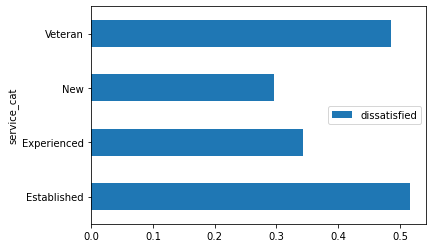

In [30]:
# pivot table by categories
pv_table = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
pv_table.plot(kind='barh')

From our analysis we see that the highest amount of 'dissatisfied' among employees who worked for a long time.

### Dissatisfaction by age

We are going to explore the **age** column and compare with dissatisfaction

In [31]:
# general information about 'age' column
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [32]:
# updating range format
combined_updated['age']= (combined_updated['age'].
                          str.strip().
                          str.replace('  ', '-'))

# check result
combined_updated['age'].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [33]:
# group ages:
ages_grouped = {'20 or younger':'25 or younger','21-25':'25 or younger','26-30':'26-35',
               '31-35':'26-35', '36-40':'36-45', '41-45':'36-45', '46-50':'46-55',
               '51-55':'46-55', '56-60':'56 or older', '61 or older':'56 or older'}
combined_updated['by_age'] = combined_updated['age'].map(ages_grouped) 

combined_updated['by_age'].value_counts(dropna=False)

36-45            166
46-55            152
26-35            128
NaN               84
25 or younger     72
56 or older       49
Name: by_age, dtype: int64

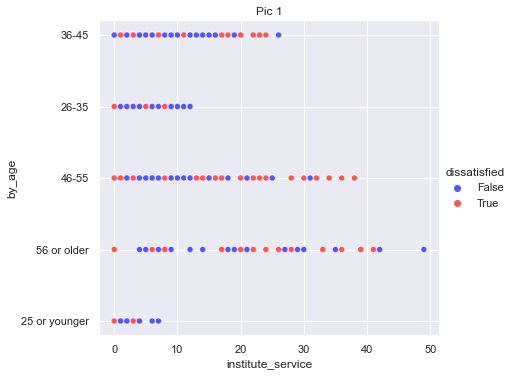

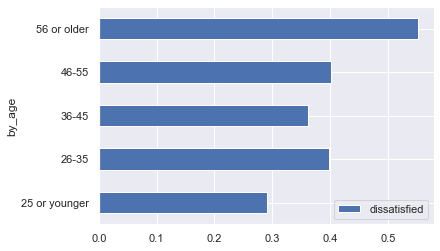

In [34]:
# apply seaborn to compare relations between institute_service and age with hue dissatisfied
sns.set_theme()
sns.relplot(data=combined_updated, x='institute_service', y='by_age', hue='dissatisfied',
            palette='seismic', aspect=1.25)
plt.title('Pic 1')
plt.show()

# pivot table by role:
pv_table1 = combined_updated.pivot_table(values='dissatisfied', index='by_age')
pv_table1.plot(kind='barh')
plt.show()

In this block, we have cleared and grouped the age column. Then we carried out an analysis using the seaborn library and determined the following: more unsatisfied are older workers and those who have worked for more than 5 years in companies.

### Dissatisfaction by position

Let's have a look at **position** column.


In [35]:
# value counts in position column:
combined_updated['position'].value_counts()

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)      5
Executive (SES/SO)                                     

In [36]:
# mapping positions in a new columns 'by_role'
roles_grouped = {'Administration (AO)':'Administration',
                 'School Administrative Staff':'Administration',
                 'Teacher':'Teacher',
                 'Teacher (including LVT)':'Teacher', 
                 'Teacher Aide':'Teacher', 
                 'Tutor':'Teacher',
                 'Cleaner':'School Staff', 
                 'Public Servant':'School Staff',
                 'School Based Professional Staff (Therapist, nurse, etc)':'School Staff', 
                 'Other':'School Staff', 
                 'Professional Officer (PO)':'Officer',
                 'Operational (OO)': 'Officer',
                'Technical Officer':'Officer',
                'Schools Officer':'Officer',
                'Workplace Training Officer':'Officer',
                'Technical Officer (TO)':'Officer',
                'Guidance Officer':'Officer',
                'Professional Officer':'Officer',
                'Business Service Manager':'Manager',
                'Executive (SES/SO)':'Manager',
                'Head of Curriculum/Head of Special Education':'Manager'}

combined_updated['by_role'] = combined_updated['position'].map(roles_grouped)
combined_updated['by_role'].value_counts(dropna=False)

Teacher           290
Administration    156
School Staff       77
Officer            60
NaN                53
Manager            15
Name: by_role, dtype: int64

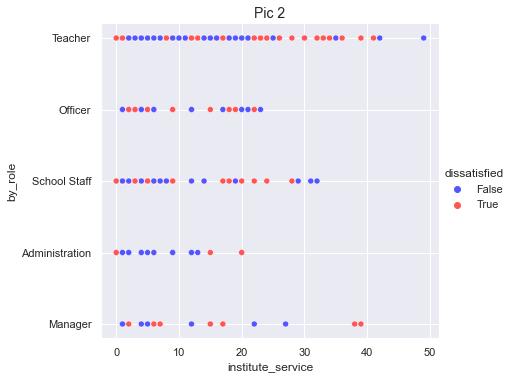

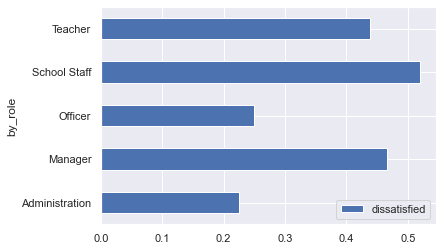

In [37]:
# seaborn to compare relations between institute_service and position with hue dissatisfied:
sns.set_theme()
sns.relplot(data=combined_updated, x='institute_service', y='by_role', hue='dissatisfied',
            palette='seismic', aspect=1.25)
plt.title('Pic 2', size=14)
plt.show()

# pivot table by role:
pv_table2 = combined_updated.pivot_table(values='dissatisfied', index='by_role')
pv_table2.plot(kind='barh')
plt.show()

### General observations using seaborn

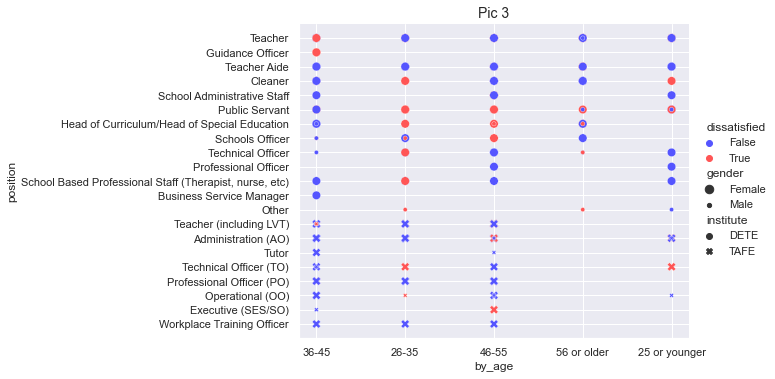

In [38]:
# seaborn to compare deeper position column:
sns.set_theme()
sns.relplot(data=combined_updated, 
            x='by_age',
            y='position', 
            hue='dissatisfied',
            size='gender',
            style='institute',
            palette='seismic', 
            aspect=2.0)
plt.title('Pic 3', size=14)
plt.show()


## Conclusion

We will start our conclusion from answering the initial questions:
1. *Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?* 

If we look at **Pic 1** (first seaborn graph) we will see a lot of red circles (dissatisfied) on mark 0 (x-coordinate) and after 15-20 years in all age groups. So we can be sure that employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction as well as those who have been there longer.


2. *Are younger employees resigning due to some kind of dissatisfaction? What about older employees?* 

To answer this question let's have a look at **Pic 1** again that tell us that amount of red circles is larger among 40-60 age group (end of 36-45, 46-55, 56 and older) but younger age groups do dissatisfied as well.


#### Summary:


*  Stability. We see a lot of people working in the institutes for a long time 20-40 years and  balanced by different aged groups.(Pic 1)
*  Position groups. We would admit larger dissatisfaction among teachers (after 20 years in workplace), school staff, and managers.(Pic 2)
*  (Pic 3) notes:
    * 26-35 the most problematic group, represented in all positions;
    * Public Servant, Head of Curriculum/Head of Special Education, Cleaner - here the employees dissatisfied the most, represented in all three groups
    * Teachers after 36
    * Most employees are female.
    

